In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from detectron2_repo.detectron2.evaluation.xview_evaluation import (
    get_xview_localization_gt_image,
    get_xview_damage_gt_image
)
import cv2
import os
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [8]:
dataDir='data/train/images'
annFile='datasets/combined_xview_damage_assessment_instance_segmentation_dataset_train.json'
gt_path = "data/train_gt/"

In [9]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=5.56s)
creating index...
index created!


In [10]:
# display COCO categories and supercategories
catIds = coco.getCatIds();
cats = coco.loadCats(catIds)
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
no-damage minor-damage major-damage destroyed

COCO supercategories: 
building


In [11]:
# Go through all images.
imgIds = coco.getImgIds()
from tqdm import tqdm
for img_id in tqdm(imgIds):
    img = coco.loadImgs(img_id)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    file_name = img['file_name']
    height = 1024
    width = 1024
    image_id = img_id
    pred_image = get_xview_damage_gt_image(file_name, height, width, image_id, anns)
    cv2.imwrite(os.path.join(gt_path, file_name), pred_image)


100%|██████████| 9076/9076 [07:43<00:00, 19.59it/s]


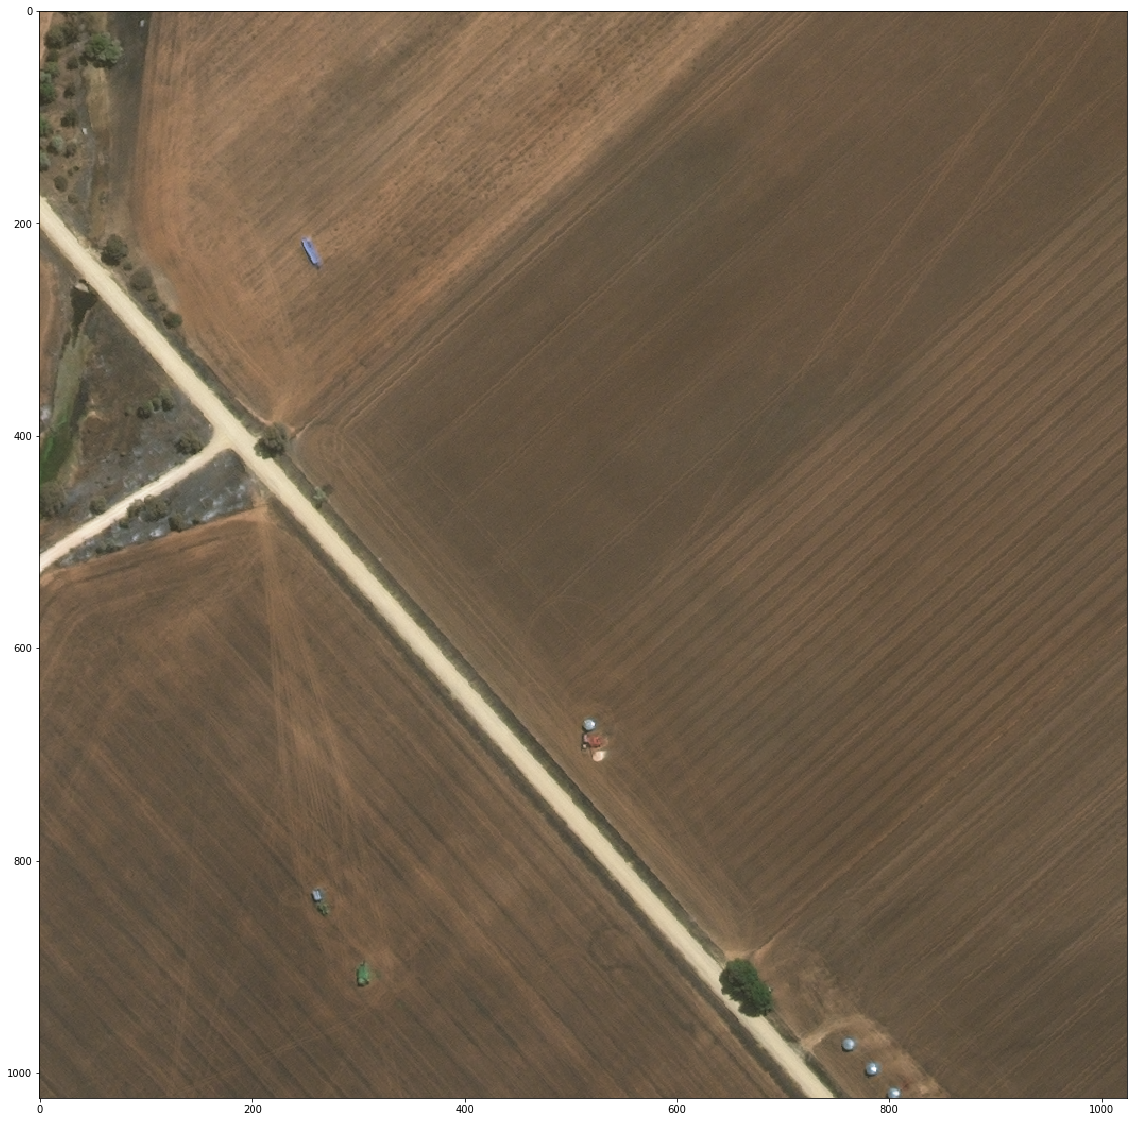

In [6]:
# I = io.imread('%s/%s'%(dataDir,img['file_name']))
# plt.imshow(I)

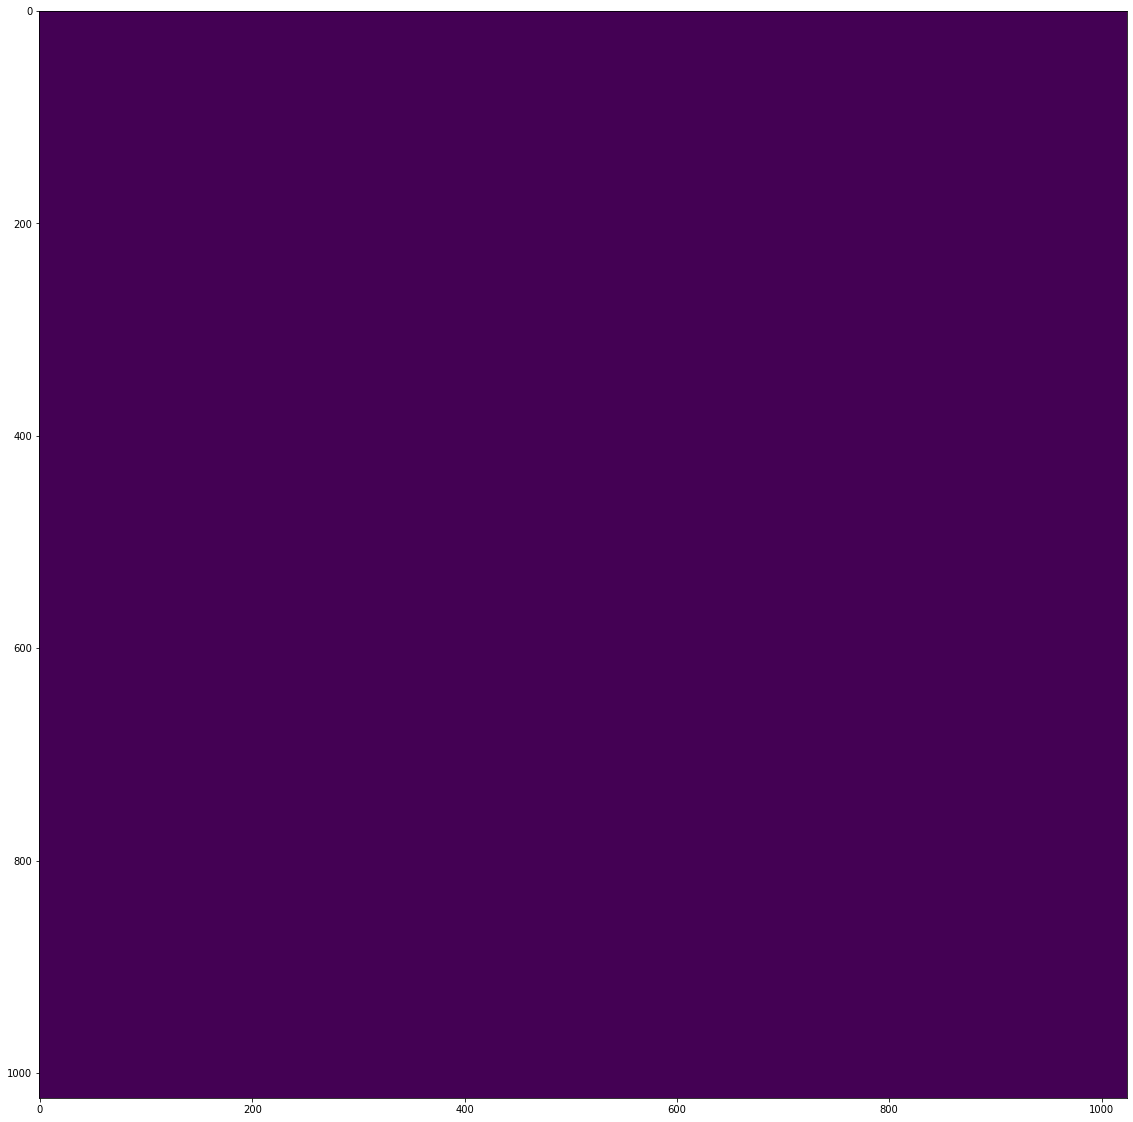

In [7]:
# plt.imshow(pred_image)